## Overview

Cricket.csv has data set about the batting figures of batsmen in ODI matches. We need to choose strike rate and average as the two factors and cluster the dataset. Based on the clusters formed, analyse and find answes

- Find which all players are in same cluster as Virat Kohli
- Analyse the type of clusters formed (High Avg- High SR, High Av-Low SR, etc)

### 1. Read and understand the data

In [17]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cricket_df = pd.read_csv('Cricket.csv', encoding_errors = 'ignore')

In [10]:
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [11]:
cricket_df.shape

(79, 13)

In [12]:
# check for null values
cricket_df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

<Axes: ylabel='Ave'>

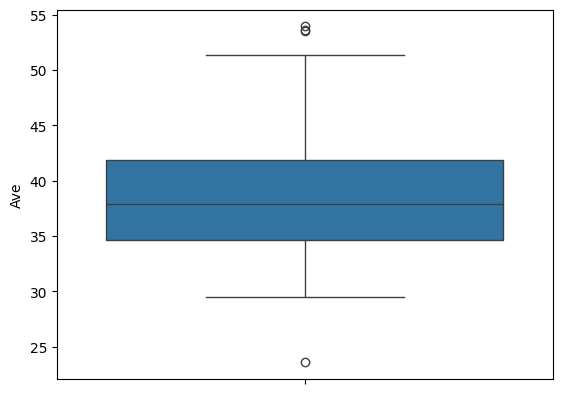

In [24]:
# Analyzing the average data
sns.boxplot(cricket_df.Ave)

In [26]:
# Analyze the players having average greater than 50
cricket_df[cricket_df.Ave > 50.0]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
13,MS Dhoni(Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8
15,AB de Villiers(Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7
25,V Kohli(INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11
34,HM Amla(SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3
38,MG Bevan(AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5


In [35]:
cricket_df.Ave.describe()

count    79.000000
mean     38.523291
std       5.919093
min      23.570000
25%      34.600000
50%      37.870000
75%      41.845000
max      53.940000
Name: Ave, dtype: float64

#### It is seen that there are 5 players who have average greater than 50 and only 1 around 20. So this should be good

<Axes: ylabel='SR'>

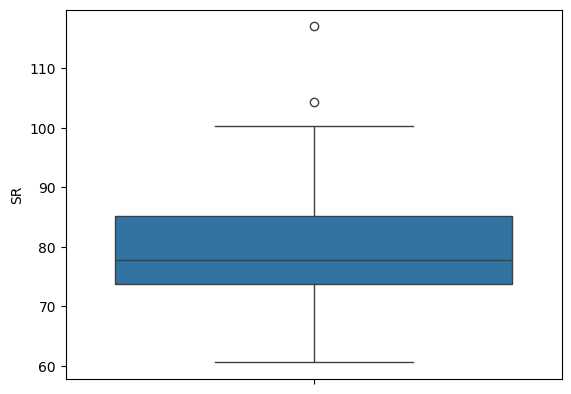

In [37]:
# Analyzing the strike rate data
sns.boxplot(cricket_df.SR)

In [36]:
# Analyze the players have strike rate lesser than 20
cricket_df.SR.describe()

count     79.000000
mean      79.295316
std        9.925307
min       60.570000
25%       73.725000
50%       77.730000
75%       85.180000
max      117.000000
Name: SR, dtype: float64

In [39]:
cricket_df[cricket_df.SR > 100]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
15,AB de Villiers(Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7
24,V Sehwag(Asia/ICC/INDIA),1999-2013,251,245,9,8273,219,35.05,7929,104.33,15,38,14
27,Shahid Afridi(Asia/ICC/PAK),1996-2015,398,369,27,8064,124,23.57,6892,117.00,6,39,30


In [13]:
# choosing strike rate and average as the two factors for clustering
cluster_df = cricket_df[['Ave','SR']]

In [14]:
cluster_df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [15]:
cluster_df.rename(columns={'Ave':'Avg'}, inplace=True)

In [16]:
cluster_df.head()

,Avg,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


### 2. Modelling

In [40]:
# Rescaling

#instantiate a scaler

scaler = StandardScaler()

In [41]:
#fit_transform
cluster_df_scaled = scaler.fit_transform(cluster_df)

In [42]:
cluster_df_scaled

array([[ 1.07229395,  0.70315153],
       [ 0.58772461, -0.0441395 ],
       [ 0.59622582,  0.1109969 ],
       [-1.04790945,  1.20709133],
       [-0.87618487, -0.03399986],
       [ 0.16946476, -0.51259058],
       [ 0.99238251, -0.64947564],
       [ 0.42450125, -0.56734461],
       [ 0.108256  , -0.8167796 ],
       [ 0.33268811,  0.02176813],
       [ 0.12695867,  0.70315153],
       [ 0.54181804, -0.42538973],
       [-0.44772356,  1.78910632],
       [ 2.17575185,  0.95258652],
       [-0.2725985 , -0.53489778],
       [ 2.5549061 ,  2.1247282 ],
       [-0.61604765,  0.1860302 ],
       [-0.20288853,  0.58958763],
       [ 0.11675721,  0.13938788],
       [ 0.52311536, -0.86747777],
       [-0.3355075 ,  0.84916225],
       [ 0.48400977, -1.64315977],
       [-0.16208269, -1.17369472],
       [ 0.14056062, -0.24287632],
       [-0.590544  ,  2.53842527],
       [ 2.62121559,  1.1857981 ],
       [-0.40691772,  0.4020044 ],
       [-2.5424233 ,  3.82311689],
       [-1.04110847,

In [44]:
# Convert it into dataframe for further steps

cluster_df_scaled = pd.DataFrame(cluster_df_scaled)

In [45]:
cluster_df_scaled

,0,1
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


In [46]:
cluster_df_scaled.columns = ['Avg','SR']

In [47]:
cluster_df_scaled

,Avg,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000
...,...,...
74,1.106299,-1.457604
75,0.829159,-0.562275
76,-0.537836,-0.234765
77,0.208570,1.332823


In [65]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(cluster_df_scaled)

KMeans(n_clusters=3, random_state=100)

In [66]:
# assign the labels to cricket data frame
cricket_df['Cluster_Id'] = kmeans.labels_
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
0,SR Tendulkar(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0
1,KC Sangakkara(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,2
4,DPMD Jayawardene(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1


### 3. Analysis & Findings

In [67]:
# Find cluster of Virat Kohli
cricket_df[cricket_df.Player.str.contains('Kohli', case=False)]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
25,V Kohli(INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,0


### 1. Find which player is in same cluster as Virat Kohli

In [68]:
# Find the cluster assigned to Virat Kohli
virat_cluster = cricket_df[cricket_df['Player'].str.contains("V Kohli", case=False, na=False)]['Cluster_Id'].values[0]

# Find players in the same cluster as Virat Kohli
same_cluster_players = cricket_df[cricket_df['Cluster_Id'] == virat_cluster]['Player']

# Check for the specific players among the options provided
target_players = ["ST Jayasuriya", "SR Tendulkar", "CH Gayle", "Yuvraj Singh"]
players_in_same_cluster = [player for player in target_players 
                           if same_cluster_players.str.contains(player, case=False, na=False).any()]

# Output the results
print("Players in the same cluster as Virat Kohli:")
print(same_cluster_players.to_list())
print("\nAmong the provided players:")
print(players_in_same_cluster)

Players in the same cluster as Virat Kohli:
['SR Tendulkar(INDIA)', 'MS Dhoni(Asia/INDIA)', 'AB de Villiers(Afr/SA)', 'V Kohli(INDIA)', 'MJ Clarke(AUS)', 'HM Amla(SA)', 'MG Bevan(AUS)', 'IVA Richards(WI)', 'LRPL Taylor(NZ)', 'ML Hayden(AUS/ICC)', 'MJ Guptill(NZ)', 'MEK Hussey(AUS)', 'RG Sharma(INDIA)']

Among the provided players:
['SR Tendulkar']


### 2. Analyze various kinds of clusters formed

<Axes: xlabel='Cluster_Id', ylabel='Ave'>

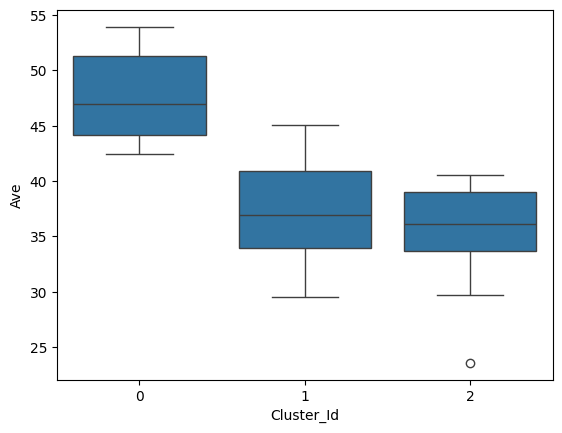

In [71]:
# plot cluster v/s Average
sns.boxplot(x='Cluster_Id', y='Ave', data=cricket_df)

<Axes: xlabel='Cluster_Id', ylabel='SR'>

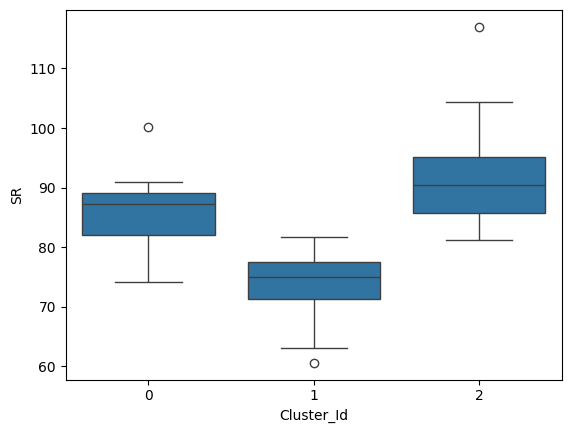

In [72]:
# plot cluster v/s Strike rate
sns.boxplot(x='Cluster_Id', y='SR', data=cricket_df)

#### Findings & Cluster Analysis:

- <b>Cluster 0:</b>

Strike Rate (SR): This cluster has a median SR of around 85.

Average (Ave): The median Ave value is around 47.5, with an interquartile range (IQR) from 45 to 50.

Findings:

High Performing: Cluster 0 appears to consist of data points with relatively high performance in terms of both SR and Ave. This suggests that entities in this cluster are likely to have strong consistent performances.

- <b>Cluster 1:</b>

Strike Rate (SR): The median SR for this cluster is around 75.

Average (Ave): The median Ave value is around 37.5, with an IQR from 35 to 40.

Findings:

Moderate Performing: Cluster 1 includes data points that show moderate performance levels. There is a noticeable drop in both SR and Ave compared to Cluster 0. Entities in this cluster might be performing steadily but not exceptionally.

- <b>Cluster 2:</b>

Strike Rate (SR): This cluster has the highest median SR of around 90.

Average (Ave): The median Ave value is around 35, with an IQR from 32 to 38. However, an outlier shows a significantly lower value around 25.

Findings:

High Strike Rate, Lower Average: Cluster 2 is interesting because it has the highest SR among the clusters but a lower median Ave value compared to Cluster 0. This could imply entities that are very efficient in striking but might not be as consistent in their average performance.


<b>Overall Insights:</b>

Cluster 0 represents high-performing entities that maintain both high SR and high average performance.

Cluster 1 consists of moderately performing entities, showing balanced but not outstanding metrics.

Cluster 2 has entities with excellent SR but slightly lower average performance, suggesting variability in consistency.